In [12]:
from mlnexus.linear_model._logistic_regression import MyLogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target
X_train,X_test,  y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
print(X_train_scaled.shape, y_train.shape)

(455, 30) (455,)


In [3]:
mylogisticRegression = MyLogisticRegression()
mylogisticRegression.fit(X_train_scaled, y_train)

Epochs completed - 100
Epochs completed - 200
Epochs completed - 300
Epochs completed - 400
Epochs completed - 500
Epochs completed - 600
Epochs completed - 700
Epochs completed - 800
Epochs completed - 900
Epochs completed - 1000
~~~~~ Training Completed ~~~~~~


In [4]:
my_predictions = mylogisticRegression.predict(X_test_scaled)
my_score = accuracy_score(my_predictions, y_test)
print(f"My Logistic Regression classification accuracy score: {my_score:.2f}")

My Logistic Regression classification accuracy score: 0.97


In [6]:
logReg = LogisticRegression(max_iter = 1000,random_state=42)
logReg.fit(X_train_scaled, y_train)
score = logReg.score(X_test_scaled, y_test)
print(f"Scikit Learn Logistic Regression classification accuracy: {score:.2f}")

Scikit Learn Logistic Regression classification accuracy: 0.98


Confusion Matrix:
[[40  3]
 [ 0 71]]

Accuracy: 0.97


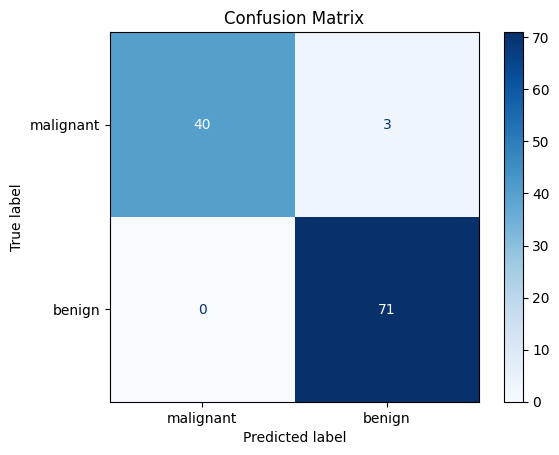

In [13]:
cm = confusion_matrix(y_test, my_predictions)

print("Confusion Matrix:")
print(cm)
print(f"\nAccuracy: {accuracy_score(y_test, my_predictions):.2f}")

# --- 4. Visualize the Confusion Matrix using ConfusionMatrixDisplay ---
# Create an instance of the display class
# It takes the confusion matrix and the class names as input.
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=data.target_names)

# Use the .plot() method to generate the visualization
# This automatically handles the axes, labels, and colormap.
disp.plot(cmap=plt.cm.Blues)

plt.title('Confusion Matrix')
plt.show()
